*7. Random Forest & Ensemble*

---

## Ensemble
- 여러 개의 모델을 생성하고, 모델의 예측을 결합함으로써 보다 정확한 예측을 도출하는 기법

-  다양한 모델을 조합하여 더 정확한 예측에 도움을 주는 방식

- __일반적으로__ 앙상블은 하지 않았을 때보다 성능이 높음. 하나의 예측기와 비교하였을 때, 편향은 크고 분산은 작음

- sklearn의 모델 중 단일모델처럼 보이지만 내부적으로 앙상블 기법을 사용하는 모델 존재 ex) RandomForest, XGBoost, LightGBM, 등 

- 일반적으로 Voting, Averaging, Bagging, Boosting이 있음 

---

## Voting
-  말그대로 투표하여 결과를 도출하는 방식

- 개별 분류기 중 가장 뛰어난 것보다 정확도가 높을 경우가 많음

|방식             |    방식_kor    | 설명|
|-----------------|-----|-----|
|Hard Voting |직접 투표 |'다수결'의 방법. 예측들의 결과 집계를 바탕으로 더 수가 많은 결과 도출   ex) 클래스 1로 예측한 모델이 5, 0으로 예측한 모델이 1이면 최종 결과는 클래스 1 
|Soft Voting |간접투표  |모델이 해당 class에 해당할 확률을 평균내어 결과를 도출  ex) 모델1은 클래스1에 해당할 확률을 0.6으로 예측, 모델2는 0.4로 예측하면 최종 결과는 0.5 |

- <span style="color:red">직접투표방식보다 간접투표 방식이 성능이 더 높음!!</span>

---

## Bagging & Pasting
![이미지](https://upload.wikimedia.org/wikipedia/commons/6/6b/Bagging.png)


>Bagging
>> - 같은 알고리즘을 사용하고 <span style="color:blue"> 훈련세트의 서브셋을 무작위로 </span> 구성하여 model을 각각 다르게 학습 시키는 방법
>> - 복원추출 -> 데이터를 전부 사용하지 않음 -> 남는 데이터 있음 -> oob평가

>Pasting
>> - 훈련세트에서 <span style="color:blue"> 중복을 허용하지 않고 </span> 샘플링하는 방식
>> - 비복원추출 -> 데이터를 모두 사용

>obb 평가?
>> - 배깅을 사용하면 어떠한 샘플은 여러 번 선택되고, 어떤 것은 전혀 선택되지 않은데, <span style="color:blue"> 선택되지 않은 샘플을 out-of-bag. 즉, oob샘플</span>이라고 부르고, 예측기가 훈련되는 동안 oob 샘플을 사용하여 평가가 가능 

### RandomForest
- Decision Tree + Bagging = RandomForest
- 블랙박스모형이기 때문에 설명 변수와 반응 변수의 설명력을 확보하기 어렵다는 단점

>Random?
>> - <span style="color:blue">전체의 샘플에 Bagging의 방식을 사용</span>하여 random성(무작위성)을 추가해줌. 이후 학습에는 Decision Tree 알고리즘이 사용됨 .
>> - 선택한 데이터에 대하여 각각 모든 특성을 기준으로 지니계수/엔트로피를 사용하여 불순도를 계산. 가장 불순도가 낮은 특성을 선택하여 split  -> 연산량이 많음 -> 속도가 더 걸림
>> - Decision Tree 알고리즘의 단점이었던 <span style="color:blue">과적합 문제를 random성을 추가해줌으로 인하여 완화</span>

>변수중요도
>> - Ramdom Forest의 장점 중 하나는 <span style="color:blue">특성의 중요도를 측정하기 쉽다</span>는 것
>> - 특성을 선택해야 할 때, 변수의 중요도를 빠르게 확인할 수 있어서 좋음
>> - 이 부분은 추가로 정리 필요

### Extra tree (Extremely randomized tree)
- RandomForest + 무작위성(Random) = Extra Tree
- 극도로 random한 알고리즘
>Extreme?
>> - Random Forest에 더해서 특성을 선택하는 것 또한 random으로 선택.
>> - 극도로(Extreme) random한 모델
>> - Extra Trees가 Random Forest에 비해 <span style="color:blue">Bias를 낮출 수 있고</span>, Split Point를 Random하게 선택하면서 <span style="color:blue">Variance를 줄일 수 있음.</span>
>> - 특성을 선택하는 것도 random. 즉, <span style="color:blue">연산량이 적고 속도가 빠름 연산 속도를 약 1/3로 줄일 수 있음</span>

---

## Boosting
![이미지](https://upload.wikimedia.org/wikipedia/commons/b/b1/Boosting.png) 
- 모든 데이터를 사용하여 학습. 
- 앞의 모델을 보완해나가면서 하나의 예측기를 학습하는 알고리즘

### Adaboost
- 이전 모델이 <span style="color:blue">과소 적합했던 훈련 샘플의 가중치를 더 높</span>이는 방식 기반
- '가중치'를 기반으로 모델이 처음 훈련에서 잘 학습하지 못했던 샘플의 가중치를 올려서 다음 훈련에서 잘 학습할 수 있도록 함.
- <span style="color:blue">성능이 좋았던 예측기에는 높은 가중치</span>를 두어 결과를 냄
- 모든 예측기의 훈련이 마무리되면 배깅, 페이스팅과 비슷한 방식으로 예측을 만듦. 하지만 정확도에 따라 가중치를 둠
- 최종 예측 시 모든 예측기의 결과를 계산하고 예측기에 가중치를 더해 예측 결과를 만들고, <span style="color:blue">가중치의 합이 가장 큰 클래스가 예측 결과가 됨</span>
-  모델들을 병렬화할 수 없기 때문에 배깅이나 페이스팅만큼 확장성이 좋지는 않음

### Gradient Boosting
- Gradient Boosting는 이전 예측기가 만든 잔여 오차를 학습시키는 알고리즘
- 간단한(depth가 작은) Decisiontree모델을 생성한 후, 생기는 오차에 대하여 다른 모델로 학습을 시키는 과정을 반복
- 트리가 앙상블에 추가될수록 앙상블의 예측이 점차 좋아짐

---

## Feature importance

### 1.MDI(Mean Decrease in Impurity) Importance
- 특성을 기준으로 샘플들을 spit할 때, 불순도가 감소하는 양을 바탕으로 Feature importance를 구하는 방식
- 즉, 불순도 감소가 클경우 중요한 변수라고 판단
- sklearn의 default로 내장되어있음

|          장점    |                              단점                               |
|:------------------:|:-----------------------------------------------------------------:|
|빠르고 직관적이다.|과적합에 취약하고, high-cardinality 범주형 변수에 대해서는 편향됨|

> cardinality?
>> - cardinality는 중복도와 연관지어 생각하면 이해가 편함.
>> - 중복도가 높으면 cardinality는 낮고, 중복도가 낮으면 cardinality가 높다. 즉 데이터들이 가진 분산이라고 생각하면 편함

> DecisionTree의 Feature importance
>> - CART 알고리즘은 중요하지 않은 변수는 제거해버리는 특성이 있음. 따라서 DecisionTree로 변수 중요도를 확인하면 중요도가 0인 변수가 생김
>> - 즉, 모든 변수에 대한 변수 중요도를 확인할 수 없다는 단점이 있음
>> - 하지만 RandomForest는 이러한 단점을 보완함

> RandomForest의 Feature importance -> 현재 sklearn의 MDI는 RF를 기본으로 사용하고 있으나, RF가 MDI방식에서만 쓰이는 것은 아님
>> - RandomForest는 Bagging기반으로 학습됨. 자세한 내용은 아래에
>> - 1.데이터를 비복원 추출하여 여러개의 데이터셋이 생성되고, 
>> - 2.각각의 데이터셋의 변수에 대한 중요도를 구함. 
>> - 3.이 변수 중요도들의 평균으로 최종 Feature importance를 구함
- 즉, DecisionTree와 다르게 모든 변수에 대한 중요도를 확인할 수 있게됨.
- 하지만 이런 MDI방식에도 단점이 존재함

#### MDI방식의 단점
- MDI방식은 Tree계열 모델을 사용하기 때문에 모델이 train set에 과적합될 수 있다는 단점이 있다. 즉, test set에서는 중요하지 않은 변수이지만 train set에서는 중요한 변수로 인식됨.
- 우리가 공부했듯, tree계열 모델은 variance는 낮으나 bias가 높다. 따라서 연속형변수(중복도가 낮음. 즉,high cardinality) 또는 high cardinality 범주형 변수인 경우 중요도가 부풀려짐
- 많이 찾아보았으나, high cardinality인 경우 split할 것이 많기 때문이라고 추정함

### 2. Permutation importance
- 독립변수의 중요도를 판단하는 방법
- 변수들의 상호관계는 고려하지 않음
- 변수들간의 상관관계가 높으면 해당 변수의 중요도가 높게 평가되는 경우가 있기 때문에 변수들의 상관관계를 확인하는 것이 필요

### 참고
[변수중요도1](https://velog.io/@vvakki_/%EB%9E%9C%EB%8D%A4-%ED%8F%AC%EB%A0%88%EC%8A%A4%ED%8A%B8%EC%97%90%EC%84%9C%EC%9D%98-%EB%B3%80%EC%88%98-%EC%A4%91%EC%9A%94%EB%8F%84Variable-Importance-3%EA%B0%80%EC%A7%80)

[변수중요도2](https://soohee410.github.io/iml_tree_importance)

[extra tree](https://wyatt37.tistory.com/m/6)


### 그림 출처
[Bagging](https://id.wikipedia.org/wiki/Berkas:Bagging.png)

[Boosting](https://upload.wikimedia.org/wikipedia/commons/b/b1/Boosting.png)

---

## Code 

### 타이타닉 데이터에 적용

In [1]:
# 모듈 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Waeing
import sys, warnings
if not sys.warnoptions: warnings.simplefilter("ignore")
    
#matplotlib 한글깨짐 지원
import platform
from matplotlib import font_manager, rc
path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...')
rc('axes', unicode_minus=False) 

- 데이터 불러오기

In [2]:
# 데이터 불러오기
path = './datasets/titanic/'
train = pd.read_csv(path+'train.csv', index_col='PassengerId') # `PassengerId` 열을 인덱스 열로 지정
test = pd.read_csv(path+'test.csv', index_col='PassengerId')

In [3]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


- 간단한 전처리

In [4]:
# encoder 함수 지정
def encoder(data, kind):
    # 범주형 변수와 수치형 변수를 분리
    cat_features = data.select_dtypes(include=['object']).columns.to_list()
    num_features = data.select_dtypes(exclude='object').columns.to_list() 
    if kind == 'onehot':
        # 원핫인코딩
        data_cat = pd.get_dummies(data[cat_features])
        data = pd.concat([data,data_cat],axis=1).drop(columns=[f for f in cat_features])
        return data
    elif kind == 'label':
        # 라벨인코딩
        for c in cat_features:
            data[c]=pd.Categorical(data[c]).codes
        return data
    else:
        print('choose "onehot"or "label"')
# 인코딩
train = encoder(train, 'label')
test = encoder(test, 'label')

In [5]:
# 간단한 결측값 처리
## train
train['Age'] = train['Age'].fillna(train['Age'].mode()[0])
## test
test['Age'] = test['Age'].fillna(test['Age'].mode()[0])
test['Fare'] = test['Fare'].fillna(test['Fare'].mode()[0])

In [6]:
# 데이터를 학습과 검증으로 분리
x_train, x_valid, y_train, y_valid = train_test_split(train.iloc[:,1:], train.iloc[:,0], test_size=0.2)

- Voting

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", 
              probability=True, # predict_proba의 효과를 얻기 위함 
              random_state=42)

# voting 모델 선언 Hard
voting_clf_hard = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')
# voting 모델 선언 Soft
voting_clf_soft = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')

In [8]:
# score 확인 -> 이경우는 voting이 떨어짐 -> SVC의 성능이 너무 안좋기 때문으로 추정
## hard 보다 soft의 성능이 더 좋음
from sklearn.metrics import accuracy_score

# fitting
voting_clf_hard.fit(x_train, y_train)
voting_clf_soft.fit(x_train, y_train)

# 확인
for clf in (log_clf, rnd_clf, svm_clf, voting_clf_hard, voting_clf_soft):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_valid)
    print(clf.__class__.__name__, accuracy_score(y_valid, y_pred))

LogisticRegression 0.8435754189944135
RandomForestClassifier 0.8491620111731844
SVC 0.7653631284916201
VotingClassifier 0.8547486033519553
VotingClassifier 0.8491620111731844


- Bagging & Pasting
>BaggingClassifier는 predict_proba() 함수가 있으면 자동으로 soft voting을 함 -> 성능이 더 좋기때문

In [9]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Bagging model 선언
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500, # 예측기를 몇개 사용할지
    max_samples=100, # 무작위로 몇개의 샘플을 선택할 것인지
    bootstrap=True, # 중복을 허용할것인지 아닌지. True로 놓으면 bagging False로 놓으면 Pasting
    random_state=42, 
    n_jobs=-1) # 훈련과 예측에 사용할 cpu수 -1은 최대

# fitting
bag_clf.fit(x_train, y_train)
# 예측값
y_pred = bag_clf.predict(x_valid)
# 비교를 위해 트리 단일모델 선언
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(x_train, y_train)
y_pred_tree = tree_clf.predict(x_valid)

In [10]:
# score 확인
from sklearn.metrics import accuracy_score
print(f'Bagging: {accuracy_score(y_valid, y_pred)}')
print(f'  DT:    {accuracy_score(y_valid, y_pred_tree)}')

Bagging: 0.8603351955307262
  DT:    0.8268156424581006


> - 단일모델 성능이 좋았던 RF를 Bagging하면 성능이 더 좋지 않을까? 라는 의문을 갖고 진행해 보았으나 시간도 오래걸리고 성능도 .77로 좋지 않음
> - Pasting: 0.8156424581005587
>> - <span style="color:blue">일반적으로 배깅이 더 나은 모델을 만들기 때문에 더 선호</span>
>> - 하지만 cpu 파워에 여유가 있다면 <span style="color:blue">교차검증으로 모두 평가하여 더 나은쪽을 선택하는것이 좋음</span>

In [11]:
# Bagging model 선언
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500, # 예측기를 몇개 사용할지
    max_samples=100, # 무작위로 몇개의 샘플을 선택할 것인지
    bootstrap=False, # True로 놓으면 bagging False로 놓으면 Pasting
    random_state=42, 
    n_jobs=-1) # 훈련과 예측에 사용할 cpu수 -1은 최대

# fitting
bag_clf.fit(x_train, y_train)
# 예측값
y_pred = bag_clf.predict(x_valid)

# score 확인
from sklearn.metrics import accuracy_score
print(f'Pasting: {accuracy_score(y_valid, y_pred)}')

Pasting: 0.8715083798882681


- Eandom Forest & Extratree

- oob 평가

In [12]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier

# 모델 선언
extra_tree = ExtraTreesClassifier(n_estimators=100, random_state=42)
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# fitting
extra_tree.fit(x_train, y_train)
random_forest.fit(x_train, y_train)

# 예측값
y_pred_extra_tree = extra_tree.predict(x_valid)
y_pred_random_forest = random_forest.predict(x_valid)

# 확인
print(f'extra_tree: {accuracy_score(y_valid, y_pred_extra_tree)}')
print(f'random_forest: {accuracy_score(y_valid, y_pred_random_forest)}')

extra_tree: 0.8212290502793296
random_forest: 0.8491620111731844


In [13]:
# model선언 및 oob평가 -> 추가로 학습하지 않아도 된다는 장점이 있음 -> 시간이 빠름
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    bootstrap=True, oob_score=True, random_state=40)
bag_clf.fit(x_train, y_train)
bag_clf.oob_score_

0.824438202247191

- 변수중요도 DT와 RF의 비교

In [14]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)

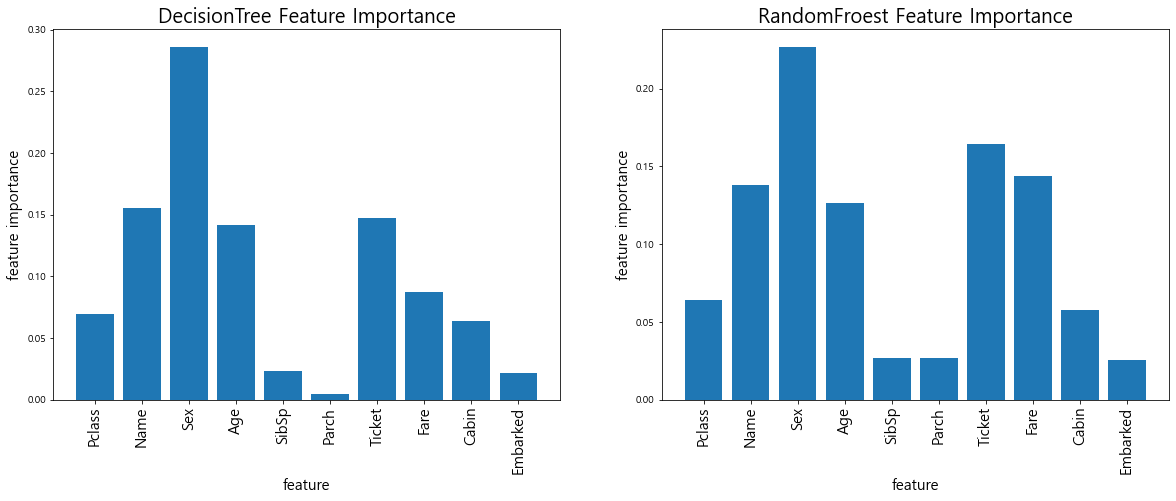

In [15]:
# fitting
decision_tree.fit(x_train, y_train)
random_forest.fit(x_train, y_train)

# 변수의 중요도를 시각적으로 확인 비교
## decision tree
feature_importance_dt = decision_tree.feature_importances_
## random forest
feature_importance_rf = random_forest.feature_importances_
#동일하게 처리
feature_name = list(train.columns)[1:] # target값 지워줌
n_feature = x_train.shape[1]
idx = np.arange(n_feature)

#dt
plt.figure(figsize=(20,15))
plt.subplot(2, 2, 1)
plt.bar(idx,feature_importance_dt)
plt.title('DecisionTree Feature Importance', fontsize=20)
plt.xticks(rotation=90) #x축 값 세로로 변경
plt.xticks(idx, feature_name, fontsize=15)
plt.xlabel('feature', size=15)
plt.ylabel('feature importance', size=15)
# rf
plt.subplot(2, 2, 2)
plt.bar(idx,feature_importance_rf)
plt.title('RandomFroest Feature Importance', fontsize=20)
plt.xticks(rotation=90) #x축 값 세로로 변경
plt.xticks(idx, feature_name, fontsize=15)
plt.xlabel('feature', size=15)
plt.ylabel('feature importance', size=15)

plt.show()

- Boosting

In [19]:
# Adaboost
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200, # 예측기를 몇개 쓸것인가 -> 과적합시 수를 줄이는 것이 조움이 됨
    algorithm="SAMME.R", 
    learning_rate=0.5, 
    random_state=42)
ada_clf.fit(x_train, y_train)

# 예측값
y_pred = ada_clf.predict(x_valid)

# 확인
print(f'Adaboost: {accuracy_score(y_valid, y_pred)}')

Adaboost: 0.8435754189944135


In [20]:
# Gradient boost
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=1000, # 파라미터 튜닝에 따라 결과 달라짐
                                learning_rate=0.05, # 파라미터 튜닝에 따라 결과 달라짐
                                max_depth=1, 
                                random_state=0).fit(x_train, y_train)

# 예측값
y_pred = gb.predict(x_valid)

# 확인
print(f'GB: {accuracy_score(y_valid, y_pred)}')

GB: 0.8491620111731844


## END